### Load the Required Libraries

In [1]:
import secrets
import string
import random
import pycountry
import numpy as np
import pandas as pd
from faker import Faker
import missingno as msno

### Load the Dataset

In [2]:
df = pd.read_csv('../dataset/hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Getting basic dataset info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.shape

(119390, 32)

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Removing unnecessary columns

In [8]:
df = df[['hotel','arrival_date_year','arrival_date_month','arrival_date_day_of_month','adults','children','meal','reserved_room_type','reservation_status','reservation_status_date', 'country']]

In [9]:
df

,hotel,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,meal,reserved_room_type,reservation_status,reservation_status_date,country
0,Resort Hotel,2015,July,1,2,0.0,BB,C,Check-Out,2015-07-01,PRT
1,Resort Hotel,2015,July,1,2,0.0,BB,C,Check-Out,2015-07-01,PRT
2,Resort Hotel,2015,July,1,1,0.0,BB,A,Check-Out,2015-07-02,GBR
3,Resort Hotel,2015,July,1,1,0.0,BB,A,Check-Out,2015-07-02,GBR
4,Resort Hotel,2015,July,1,2,0.0,BB,A,Check-Out,2015-07-03,GBR
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,2017,August,30,2,0.0,BB,A,Check-Out,2017-09-06,BEL
119386,City Hotel,2017,August,31,3,0.0,BB,E,Check-Out,2017-09-07,FRA
119387,City Hotel,2017,August,31,2,0.0,BB,D,Check-Out,2017-09-07,DEU
119388,City Hotel,2017,August,31,2,0.0,BB,A,Check-Out,2017-09-07,GBR


### Filtering out only the City Hotel Records

In [10]:
df_new = df[df['hotel'] == 'City Hotel']

In [11]:
df_new.drop('hotel', axis = 1, inplace = True)

C:\Users\anshu\AppData\Local\Temp\ipykernel_20864\1165762078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop('hotel', axis = 1, inplace = True)


### Dropping Null Values

In [13]:
df_new.isnull().sum()

arrival_date_year             0
arrival_date_month            0
arrival_date_day_of_month     0
adults                        0
children                      4
meal                          0
reserved_room_type            0
reservation_status            0
reservation_status_date       0
country                      24
dtype: int64

<Axes: >

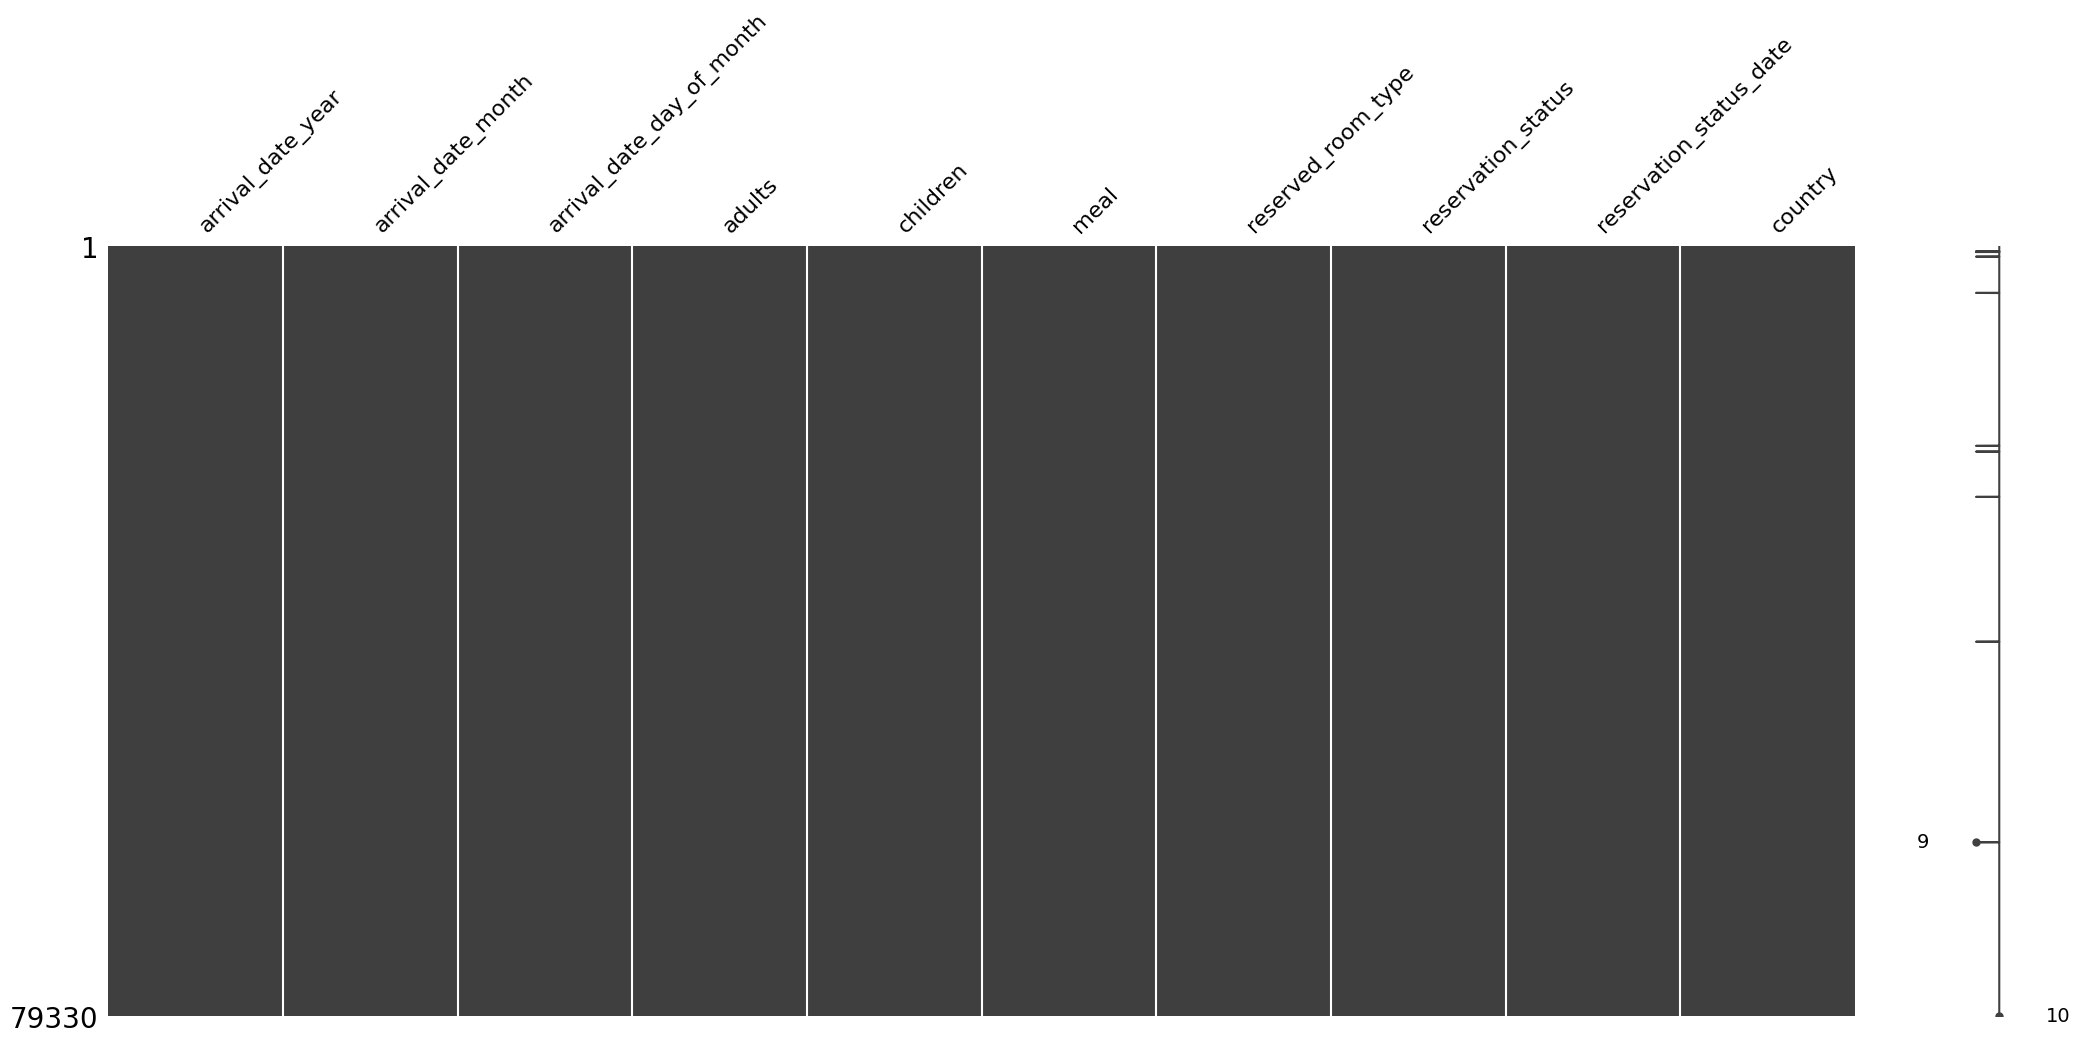

In [14]:
msno.matrix(df_new)

In [15]:
df_new.isnull().sum()

arrival_date_year             0
arrival_date_month            0
arrival_date_day_of_month     0
adults                        0
children                      4
meal                          0
reserved_room_type            0
reservation_status            0
reservation_status_date       0
country                      24
dtype: int64

In [16]:
df_new.dropna(inplace = True)

C:\Users\anshu\AppData\Local\Temp\ipykernel_20864\2425992740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(inplace = True)


In [17]:
# Combine year, month, and date columns into a single column
df_new['check_in'] = df_new['arrival_date_day_of_month'].astype(str) + '-' + df_new['arrival_date_month'] + '-' + df_new['arrival_date_year'].astype(str)

# Convert combined_date column to datetime
df_new['check_in'] = pd.to_datetime(df_new['check_in'], format='%d-%B-%Y')
df_new['check_in'] = df_new['check_in'].dt.date

C:\Users\anshu\AppData\Local\Temp\ipykernel_20864\1484497470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['check_in'] = df_new['arrival_date_day_of_month'].astype(str) + '-' + df_new['arrival_date_month'] + '-' + df_new['arrival_date_year'].astype(str)
C:\Users\anshu\AppData\Local\Temp\ipykernel_20864\1484497470.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['check_in'] = pd.to_datetime(df_new['check_in'], format='%d-%B-%Y')
C:\Users\anshu\AppData\Local\Temp\ipykernel_20864\1484497

In [18]:
df_new = df_new.head(10000)

### Correcting Datatype for children column

In [19]:
df_new['children'] = df_new['children'].astype('int64')
df_new.head()

C:\Users\anshu\AppData\Local\Temp\ipykernel_20864\3022406772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['children'] = df_new['children'].astype('int64')


,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,meal,reserved_room_type,reservation_status,reservation_status_date,country,check_in
40060,2015,July,1,1,0,HB,A,Check-Out,2015-07-03,PRT,2015-07-01
40061,2015,July,1,2,0,BB,A,Canceled,2015-07-01,PRT,2015-07-01
40062,2015,July,1,1,0,BB,A,Canceled,2015-04-30,PRT,2015-07-01
40063,2015,July,1,2,0,BB,A,Canceled,2015-06-23,PRT,2015-07-01
40064,2015,July,2,2,0,BB,A,Canceled,2015-04-02,PRT,2015-07-02


### Generating Names, Email IDs and Customer IDs

In [20]:
def generate_email(name):
    parts = name.rsplit(maxsplit=1)  # Split from the right side, maximum 1 split
    if len(parts) >= 2:
        first_name, last_name = parts
        middle_name = ''
        if ' ' in first_name:
            first_name, middle_name = first_name.split(maxsplit=1)
        return f"{first_name.lower()}.{middle_name.lower()}{'' if not middle_name else '.'}{last_name.lower()}@example.com"

In [21]:
fake = Faker()

# Generate random names
customer_names = [fake.name() for _ in range(df_new.shape[0])]

# Generate random email IDs
customer_emails = list(map(generate_email, customer_names))

# Generate Customer IDs
booking_id = [i for i in range(1, df_new.shape[0]+1)]

# Generate usernames
usernames = set()
while len(usernames) < df_new.shape[0]:
    usernames.add(fake.user_name())
usernames = list(usernames)

In [22]:
df_new['Customer Names'] = customer_names
df_new['Email IDs'] = customer_emails
df_new['_id'] = booking_id
df_new['username'] = usernames

C:\Users\anshu\AppData\Local\Temp\ipykernel_20864\1582455098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Customer Names'] = customer_names
C:\Users\anshu\AppData\Local\Temp\ipykernel_20864\1582455098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Email IDs'] = customer_emails
C:\Users\anshu\AppData\Local\Temp\ipykernel_20864\1582455098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [23]:
df_new.head()

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,meal,reserved_room_type,reservation_status,reservation_status_date,country,check_in,Customer Names,Email IDs,_id,username
40060,2015,July,1,1,0,HB,A,Check-Out,2015-07-03,PRT,2015-07-01,Jasmine Baker,jasmine.baker@example.com,1,brownkevin
40061,2015,July,1,2,0,BB,A,Canceled,2015-07-01,PRT,2015-07-01,Leslie Barron,leslie.barron@example.com,2,jacquelinejones
40062,2015,July,1,1,0,BB,A,Canceled,2015-04-30,PRT,2015-07-01,Andrea Mcneil,andrea.mcneil@example.com,3,lancelewis
40063,2015,July,1,2,0,BB,A,Canceled,2015-06-23,PRT,2015-07-01,Kristin Bailey,kristin.bailey@example.com,4,nwatson
40064,2015,July,2,2,0,BB,A,Canceled,2015-04-02,PRT,2015-07-02,Sarah Ramsey,sarah.ramsey@example.com,5,rebeccagiles


### Mapping country codes to country names

In [24]:
def map_country_codes_to_names(country_codes):
    country_name_mapping = {}

    # Create a dictionary lookup for faster retrieval
    country_dict = {country.alpha_3: country.name for country in pycountry.countries}

    for code in country_codes:
        country_name_mapping[code] = country_dict.get(code, "Unknown")

    return country_name_mapping

# Example: Replace this with your list of 80k country codes
country_codes_list = set(df_new['country'])

# Map codes to country names
result_mapping = map_country_codes_to_names(country_codes_list)

# Print the result for a few codes
for code, name in list(result_mapping.items())[:5]:
    print(f"{code}: {name}")

# Print total number of mappings
print(f"Total mappings: {len(result_mapping)}")


SEN: Senegal
ALB: Albania
KAZ: Kazakhstan
SVN: Slovenia
NOR: Norway
Total mappings: 97


In [25]:
flag = False
for key, values in result_mapping.items():
    if values == 'Unknown':
        print(key)
        
for key, _ in result_mapping.items():
    if key == 'TMP':
        result_mapping[key] = 'East Timor'
    elif key == 'CN':
        result_mapping[key] = 'China'

for key, values in result_mapping.items():
    if values == 'Unknown':
        flag = True
        break
        
if not flag:
    print('No countries with unknown Country names')

CN
No countries with unknown Country names


### Substituting country codes, room type codes and meal type codes with their respective values

In [26]:
def mapping_df_values(df_new, new_col, old_col, mapping_dict):
    
    df_new[new_col] = df_new[old_col].replace(mapping_dict)

    # Drop the original 'Country Code' column if needed
    df_new.drop(columns=[old_col], inplace=True)

In [27]:
# Replace country codes with country names and dropping country column
mapping_df_values(df_new, 'Country', 'country',result_mapping)
df_new.head()

C:\Users\anshu\AppData\Local\Temp\ipykernel_20864\2826542441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[new_col] = df_new[old_col].replace(mapping_dict)
C:\Users\anshu\AppData\Local\Temp\ipykernel_20864\2826542441.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(columns=[old_col], inplace=True)


,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,meal,reserved_room_type,reservation_status,reservation_status_date,check_in,Customer Names,Email IDs,_id,username,Country
40060,2015,July,1,1,0,HB,A,Check-Out,2015-07-03,2015-07-01,Jasmine Baker,jasmine.baker@example.com,1,brownkevin,Portugal
40061,2015,July,1,2,0,BB,A,Canceled,2015-07-01,2015-07-01,Leslie Barron,leslie.barron@example.com,2,jacquelinejones,Portugal
40062,2015,July,1,1,0,BB,A,Canceled,2015-04-30,2015-07-01,Andrea Mcneil,andrea.mcneil@example.com,3,lancelewis,Portugal
40063,2015,July,1,2,0,BB,A,Canceled,2015-06-23,2015-07-01,Kristin Bailey,kristin.bailey@example.com,4,nwatson,Portugal
40064,2015,July,2,2,0,BB,A,Canceled,2015-04-02,2015-07-02,Sarah Ramsey,sarah.ramsey@example.com,5,rebeccagiles,Portugal


In [28]:
meal_mapping = {'HB':'Half Board', 'FB':'Full Board', 'SC':'No Meal', 'BB': 'Bed & Breakfast'}

# Replace meal codes with meal values and dropping meal column
mapping_df_values(df_new, 'Meals', 'meal',meal_mapping)
df_new.head()

C:\Users\anshu\AppData\Local\Temp\ipykernel_20864\2826542441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[new_col] = df_new[old_col].replace(mapping_dict)
C:\Users\anshu\AppData\Local\Temp\ipykernel_20864\2826542441.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(columns=[old_col], inplace=True)


,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,reserved_room_type,reservation_status,reservation_status_date,check_in,Customer Names,Email IDs,_id,username,Country,Meals
40060,2015,July,1,1,0,A,Check-Out,2015-07-03,2015-07-01,Jasmine Baker,jasmine.baker@example.com,1,brownkevin,Portugal,Half Board
40061,2015,July,1,2,0,A,Canceled,2015-07-01,2015-07-01,Leslie Barron,leslie.barron@example.com,2,jacquelinejones,Portugal,Bed & Breakfast
40062,2015,July,1,1,0,A,Canceled,2015-04-30,2015-07-01,Andrea Mcneil,andrea.mcneil@example.com,3,lancelewis,Portugal,Bed & Breakfast
40063,2015,July,1,2,0,A,Canceled,2015-06-23,2015-07-01,Kristin Bailey,kristin.bailey@example.com,4,nwatson,Portugal,Bed & Breakfast
40064,2015,July,2,2,0,A,Canceled,2015-04-02,2015-07-02,Sarah Ramsey,sarah.ramsey@example.com,5,rebeccagiles,Portugal,Bed & Breakfast


In [29]:
df_new['reserved_room_type'].unique()

array(['A', 'B', 'D', 'F', 'E', 'G', 'C'], dtype=object)

In [30]:
reserved_room_type_mapping = {'A':'Standard Room', 'D':'Deluxe Room', 'B':'Suite', 'F':'Executive Room', 'G': 'Family Room','E':'Presidential Suite', 'C': 'Pet Friendly room', 'P':'King Room'}

# Replace room types with room type values and dropping old room type column
mapping_df_values(df_new, 'Reserved Room_Type', 'reserved_room_type',reserved_room_type_mapping)
df_new.tail()

C:\Users\anshu\AppData\Local\Temp\ipykernel_20864\2826542441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[new_col] = df_new[old_col].replace(mapping_dict)
C:\Users\anshu\AppData\Local\Temp\ipykernel_20864\2826542441.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(columns=[old_col], inplace=True)


,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,reservation_status,reservation_status_date,check_in,Customer Names,Email IDs,_id,username,Country,Meals,Reserved Room_Type
50073,2016,April,22,2,0,Canceled,2016-01-18,2016-04-22,Carrie Gibson,carrie.gibson@example.com,9996,kbarrera,Poland,Bed & Breakfast,Standard Room
50074,2016,April,22,2,0,Canceled,2016-01-18,2016-04-22,Paul Phillips,paul.phillips@example.com,9997,lauren71,Poland,Bed & Breakfast,Standard Room
50075,2016,April,22,2,0,Canceled,2016-01-18,2016-04-22,Justin Campbell,justin.campbell@example.com,9998,mgray,Poland,Bed & Breakfast,Standard Room
50076,2016,April,22,2,0,Canceled,2016-01-18,2016-04-22,Jennifer Jones,jennifer.jones@example.com,9999,nelsonnatalie,Poland,Bed & Breakfast,Standard Room
50077,2016,April,22,2,0,Canceled,2016-01-18,2016-04-22,Ricky James,ricky.james@example.com,10000,uwiggins,Poland,Bed & Breakfast,Standard Room


### Total Members 

In [31]:
df_new['Total People'] = df_new['adults'] + df_new['children']
df_new.head()

C:\Users\anshu\AppData\Local\Temp\ipykernel_20864\3608689296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Total People'] = df_new['adults'] + df_new['children']


,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,reservation_status,reservation_status_date,check_in,Customer Names,Email IDs,_id,username,Country,Meals,Reserved Room_Type,Total People
40060,2015,July,1,1,0,Check-Out,2015-07-03,2015-07-01,Jasmine Baker,jasmine.baker@example.com,1,brownkevin,Portugal,Half Board,Standard Room,1
40061,2015,July,1,2,0,Canceled,2015-07-01,2015-07-01,Leslie Barron,leslie.barron@example.com,2,jacquelinejones,Portugal,Bed & Breakfast,Standard Room,2
40062,2015,July,1,1,0,Canceled,2015-04-30,2015-07-01,Andrea Mcneil,andrea.mcneil@example.com,3,lancelewis,Portugal,Bed & Breakfast,Standard Room,1
40063,2015,July,1,2,0,Canceled,2015-06-23,2015-07-01,Kristin Bailey,kristin.bailey@example.com,4,nwatson,Portugal,Bed & Breakfast,Standard Room,2
40064,2015,July,2,2,0,Canceled,2015-04-02,2015-07-02,Sarah Ramsey,sarah.ramsey@example.com,5,rebeccagiles,Portugal,Bed & Breakfast,Standard Room,2


### Assigning prices for Meals and Rooms 

In [32]:
price_rooms =   {'Standard Room':100, 
                'Deluxe Room':150,
                'Suite':300,
                'Executive Room':200,
                'Family Room':250,
                'Presidential Suite':350, 
                'Pet Friendly room':225, 
                'King Room':125}
price_meals = {
    'Bed & Breakfast': 25,
    'Half Board': 45,
    'No Meal': 0,
    'Full Board': 65
}

In [33]:
df_new['Price'] = df_new['Reserved Room_Type'].map(price_rooms) + df_new['Meals'].map(price_meals)*df_new['Total People']

C:\Users\anshu\AppData\Local\Temp\ipykernel_20864\1803007717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Price'] = df_new['Reserved Room_Type'].map(price_rooms) + df_new['Meals'].map(price_meals)*df_new['Total People']


In [34]:
df_new.head()

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,reservation_status,reservation_status_date,check_in,Customer Names,Email IDs,_id,username,Country,Meals,Reserved Room_Type,Total People,Price
40060,2015,July,1,1,0,Check-Out,2015-07-03,2015-07-01,Jasmine Baker,jasmine.baker@example.com,1,brownkevin,Portugal,Half Board,Standard Room,1,145
40061,2015,July,1,2,0,Canceled,2015-07-01,2015-07-01,Leslie Barron,leslie.barron@example.com,2,jacquelinejones,Portugal,Bed & Breakfast,Standard Room,2,150
40062,2015,July,1,1,0,Canceled,2015-04-30,2015-07-01,Andrea Mcneil,andrea.mcneil@example.com,3,lancelewis,Portugal,Bed & Breakfast,Standard Room,1,125
40063,2015,July,1,2,0,Canceled,2015-06-23,2015-07-01,Kristin Bailey,kristin.bailey@example.com,4,nwatson,Portugal,Bed & Breakfast,Standard Room,2,150
40064,2015,July,2,2,0,Canceled,2015-04-02,2015-07-02,Sarah Ramsey,sarah.ramsey@example.com,5,rebeccagiles,Portugal,Bed & Breakfast,Standard Room,2,150


In [35]:
df_new.shape

(10000, 17)

### Generating Customer ID field

In [36]:
# Generate Customer ID
customer_id_map = {}
current_customer_id = 1

def get_customer_id(name):
    global current_customer_id
    if name not in customer_id_map:
        current_customer_id += 1
        customer_id_map[name] = current_customer_id
    return customer_id_map[name]

df_new['Customer ID'] = df_new['Customer Names'].apply(get_customer_id)

C:\Users\anshu\AppData\Local\Temp\ipykernel_20864\2238552037.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Customer ID'] = df_new['Customer Names'].apply(get_customer_id)


### Generate Check out date

In [37]:
df_new['check_out'] = df_new['check_in'] + pd.Timedelta(days=random.randint(1, 10))
df_new['check_out'] = pd.to_datetime(df_new['check_out'], format='%d-%B-%Y')
df_new['check_out'] = df_new['check_out'].dt.date

C:\Users\anshu\AppData\Local\Temp\ipykernel_20864\678429367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['check_out'] = df_new['check_in'] + pd.Timedelta(days=random.randint(1, 10))
C:\Users\anshu\AppData\Local\Temp\ipykernel_20864\678429367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['check_out'] = pd.to_datetime(df_new['check_out'], format='%d-%B-%Y')
C:\Users\anshu\AppData\Local\Temp\ipykernel_20864\678429367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

### Rearranging the columns in dataset

In [38]:
df_final = df_new[['_id','Customer ID','username','Customer Names','Email IDs','Country','adults','children', 'Total People','Reserved Room_Type', 'check_in' , 'check_out','Meals','reservation_status','reservation_status_date','Price']]

In [39]:
df_final.reset_index(drop=True, inplace=True)

### Partitioning dataset based on people count

In [41]:
# Split the DataFrame into even and odd total people
even_df = df_final[df_final['Total People'] % 2 == 0]
odd_df = df_final[df_final['Total People'] % 2 != 0]

### Exporting the dataset

In [42]:
odd_df.to_csv('../dataset/Final_Preprocessed_Dataset_1.csv')

In [43]:
even_df.to_csv('../dataset/Final_Preprocessed_Dataset_0.csv')

### Generating Users Collection

In [44]:
df_user = pd.DataFrame()

In [45]:
df_user['_id'] = df_final['Customer ID']

In [46]:
# df_user['username'] = df_final['Customer Names'].str.split().str[0]

In [47]:
df_user['email'] = df_final['Email IDs']
df_user.shape

(10000, 2)

In [48]:
df_user.drop_duplicates(inplace=True)
df_user.shape

(9386, 2)

In [49]:
def generate_random_string(length):
    alphabet = string.ascii_letters + string.digits + string.punctuation
    return ''.join(secrets.choice(alphabet) for _ in range(length))
df_user['password'] = [generate_random_string(77) for _ in range(len(df_user))]

In [50]:
df_user['is_verified'] = 'true'
df_user['username'] = df_final['username']

In [51]:
df_user.head()

,_id,email,password,is_verified,username
0,2,jasmine.baker@example.com,zZ%Uj0#D==ek^uHj~#^N/y]J*#hU-+n(G[2'I]T0TxWP9D...,true,brownkevin
1,3,leslie.barron@example.com,[lyG-kS4dCZc7[{70aM}\q2q_;+*qB2WjM_7m@Bo]K9Z:h...,true,jacquelinejones
2,4,andrea.mcneil@example.com,"{""4uOYMiLA`bZIs,WtC)r[F?nlD_r:-Lf!|]b{`1=lV(Y>...",true,lancelewis
3,5,kristin.bailey@example.com,"Hn[?d8N?~:Ba$sEBxtl&#F;ActaJk;soh8""=]&?>u76<Vm...",true,nwatson
4,6,sarah.ramsey@example.com,^BM(wRP+OwMzd)PE6\Bdkh8<sGmfLS^:FT`9Ko;#+&Ce'v...,true,rebeccagiles


In [52]:
df_user.to_csv('../dataset/users.csv')

### Room and Meals

In [53]:
df_room = pd.DataFrame(list(price_rooms.items()), columns=['Room_Type', 'price'])
df_room['_id'] = df_room.index
df_room.set_index('_id', inplace=True)
df_user.to_csv('../dataset/room.csv')

In [54]:
df_meal = pd.DataFrame(list(price_meals.items()), columns=['Meal Type', 'price'])
df_meal['_id'] = df_meal.index
df_meal.set_index('_id', inplace=True)
df_meal.to_csv('../dataset/meal.csv')